## **Imports das bibliotecas python**


In [184]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## **Conhecendo a base de dados**

In [185]:
df = pd.read_excel('arteris.xlsx')

In [186]:
df.head(10)

,Nome Completo do Colaborador,Data de Entrada,Estado Atual,Empresa,Salário,CLUSTER,DIRETORIA
0,Colaborador 01,2023-06-21,ATIVO,VIAPAULISTA,1100.50,Operacional,Dir Operações
1,Colaborador 02,2023-06-21,ATIVO,PLANALTO SUL,2500.75,Liderança Estratégica,Pessoas & Organização
2,Colaborador 03,2023-06-27,ATIVO,PLANALTO SUL,4200.80,Operacional,Dir Operações
3,Colaborador 04,2023-06-27,ATIVO,PLANALTO SUL,1800.65,Operacional,Pessoas & Organização
4,Colaborador 05,2023-06-23,ATIVO,FLUMINENSE,5600.30,Operacional,Dir Operações
5,Colaborador 06,2023-06-29,ATIVO,FLUMINENSE,3900.25,Operacional,Dir Operações
6,Colaborador 07,2023-06-28,ATIVO,FERNAO DIAS,2000.40,Operacional,Dir Operações
7,Colaborador 08,2023-06-30,ATIVO,PLANALTO SUL,6800.90,Operacional,Pessoas & Organização
8,Colaborador 09,2023-06-29,ATIVO,FLUMINENSE,3500.70,Operacional,Dir Operações
9,Colaborador 10,2023-06-16,ATIVO,FERNAO DIAS,4900.55,Profissional,Pessoas & Organização


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Nome Completo do Colaborador  300 non-null    object        
 1   Data de Entrada               300 non-null    datetime64[ns]
 2   Estado Atual                  300 non-null    object        
 3   Empresa                       300 non-null    object        
 4   Salário                       300 non-null    float64       
 5   CLUSTER                       300 non-null    object        
 6   DIRETORIA                     300 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 16.5+ KB


In [188]:
df.isnull().sum()

Nome Completo do Colaborador    0
Data de Entrada                 0
Estado Atual                    0
Empresa                         0
Salário                         0
CLUSTER                         0
DIRETORIA                       0
dtype: int64

In [189]:
salario_zero = (df['Salário'] == 0).any()
salario_zero

False

## **Trocando nomes das colunas**

In [190]:
df =df.rename(columns={"Nome Completo do Colaborador": "Colaborador", "Data de Entrada": "Entrada"})
df

,Colaborador,Entrada,Estado Atual,Empresa,Salário,CLUSTER,DIRETORIA
0,Colaborador 01,2023-06-21,ATIVO,VIAPAULISTA,1100.50,Operacional,Dir Operações
1,Colaborador 02,2023-06-21,ATIVO,PLANALTO SUL,2500.75,Liderança Estratégica,Pessoas & Organização
2,Colaborador 03,2023-06-27,ATIVO,PLANALTO SUL,4200.80,Operacional,Dir Operações
3,Colaborador 04,2023-06-27,ATIVO,PLANALTO SUL,1800.65,Operacional,Pessoas & Organização
4,Colaborador 05,2023-06-23,ATIVO,FLUMINENSE,5600.30,Operacional,Dir Operações
...,...,...,...,...,...,...,...
295,Colaborador 296,2022-10-01,FÉRIAS,VIAPAULISTA,2000.40,Operacional,Dir Operações
296,Colaborador 297,2022-10-02,FÉRIAS,INTERVIAS,6800.90,Operacional,Dir Operações
297,Colaborador 298,2022-10-03,ATIVO,FERNAO DIAS,3500.70,Operacional,Dir Operações
298,Colaborador 299,2022-10-04,ATIVO,LITORAL SUL,4900.55,Operacional,Dir Operações


## **Iniciando tratamento dos dados**

In [191]:
contagem_demitidos = df['Estado Atual'].value_counts().to_frame().reset_index()
contagem_demitidos.columns=['Estado Atual', 'Total']
contagem_demitidos

,Estado Atual,Total
0,ATIVO,233
1,DEMITIDO,36
2,FÉRIAS,31


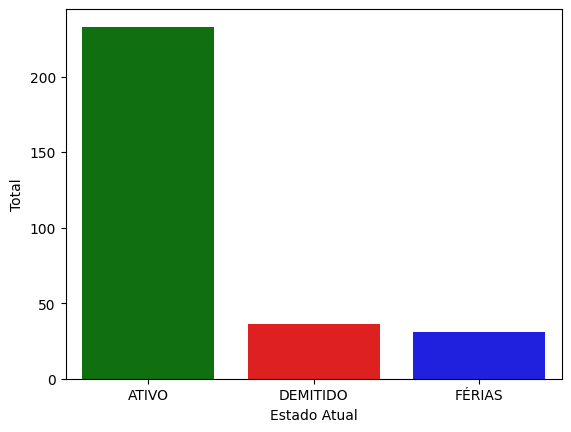

In [213]:
bx = sns.barplot(x="Estado Atual", y="Total", hue="Estado Atual", data=contagem_demitidos, palette=["green", "red","blue"], legend=False)

In [193]:
df.drop(df[df['Estado Atual'] == 'DEMITIDO'].index, inplace=True)

In [194]:
contagem_de_estado = df['Estado Atual'].value_counts().to_frame().reset_index()
contagem_de_estado.columns=['Estado Atual', 'Total']
contagem_de_estado

,Estado Atual,Total
0,ATIVO,233
1,FÉRIAS,31


<Axes: xlabel='Estado Atual', ylabel='Total'>

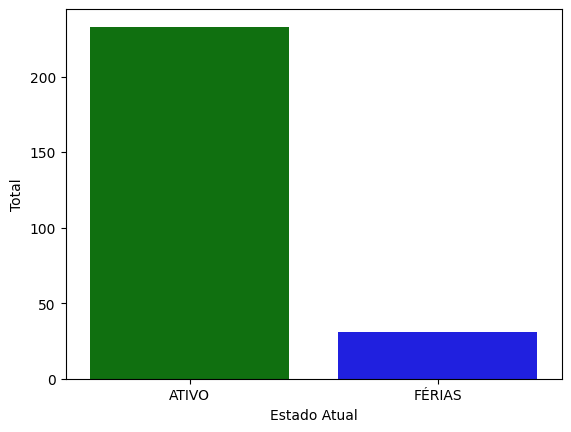

In [215]:
sns.barplot(x="Estado Atual", y="Total", hue= "Estado Atual",data = contagem_de_estado, palette=["green","blue"],legend=False)

## **Verificando que o Colaborador 31 é Aprendiz/Estagiário, porém seu salário está quase igual ao salário da Gerência**


In [196]:
media_salario = df.groupby("CLUSTER")[['Salário']].mean().round(2).sort_values('Salário').reset_index()
media_salario

,CLUSTER,Salário
0,Liderança Estratégica,5850.45
1,Estágio,6833.89
2,Profissional,7735.27
3,Operacional,8152.31
4,Liderança Tática,8616.99
5,Aprendiz/Estag,11200.70
6,Gerência,11667.18


In [197]:
df_salario_acima = df.query('`CLUSTER` == "Aprendiz/Estag"')
df_salario_acima

,Colaborador,Entrada,Estado Atual,Empresa,Salário,CLUSTER,DIRETORIA
30,Colaborador 31,2019-07-05,ATIVO,FERNAO DIAS,11200.7,Aprendiz/Estag,Dir Financeira


In [198]:
df.drop(df[df['CLUSTER'] == 'Aprendiz/Estag'].index, inplace=True)

In [199]:
media_salario = df.groupby("CLUSTER")[['Salário']].mean().round(2).sort_values('Salário').reset_index()
media_salario

,CLUSTER,Salário
0,Liderança Estratégica,5850.45
1,Estágio,6833.89
2,Profissional,7735.27
3,Operacional,8152.31
4,Liderança Tática,8616.99
5,Gerência,11667.18


## **Média de Salários por Cluster**

In [200]:
media_salario_cluster = df.groupby("CLUSTER")[['Salário']].mean().round(2).sort_values('Salário').reset_index()
media_salario_cluster

,CLUSTER,Salário
0,Liderança Estratégica,5850.45
1,Estágio,6833.89
2,Profissional,7735.27
3,Operacional,8152.31
4,Liderança Tática,8616.99
5,Gerência,11667.18


Text(0.5, 1.0, 'CLUSTER X SALÁRIO')

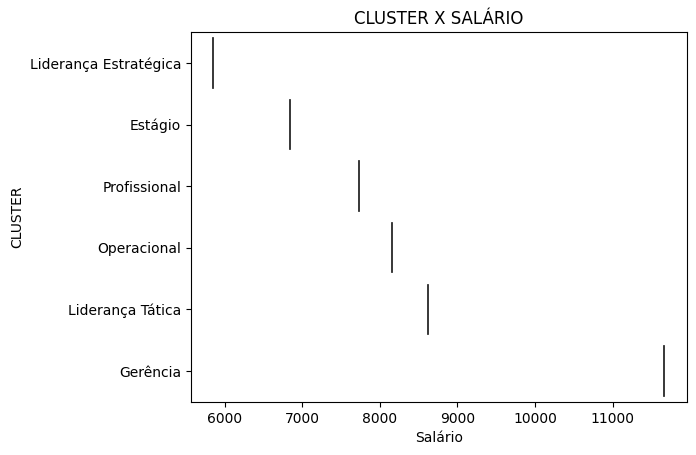

In [216]:
grafico_salarios = sns.violinplot(media_salario_cluster, x='Salário', y='CLUSTER', palette='dark',hue='Salário',legend=False)
grafico_salarios.set_title('CLUSTER X SALÁRIO')

## **Quantidade de Colaboradores por Empresa**

In [202]:
total_colaboradores = df['Empresa'].value_counts().to_frame().reset_index()
total_colaboradores.columns = ['Empresa', 'Quantidade']
total_colaboradores

,Empresa,Quantidade
0,FERNAO DIAS,77
1,LITORAL SUL,61
2,VIAPAULISTA,39
3,FLUMINENSE,29
4,PLANALTO SUL,16
5,ARTERIS,16
6,REGIS BITTENCOURT,14
7,INTERVIAS,11


Text(0.5, 1.0, 'EMPRESA X Números de colaboradores')

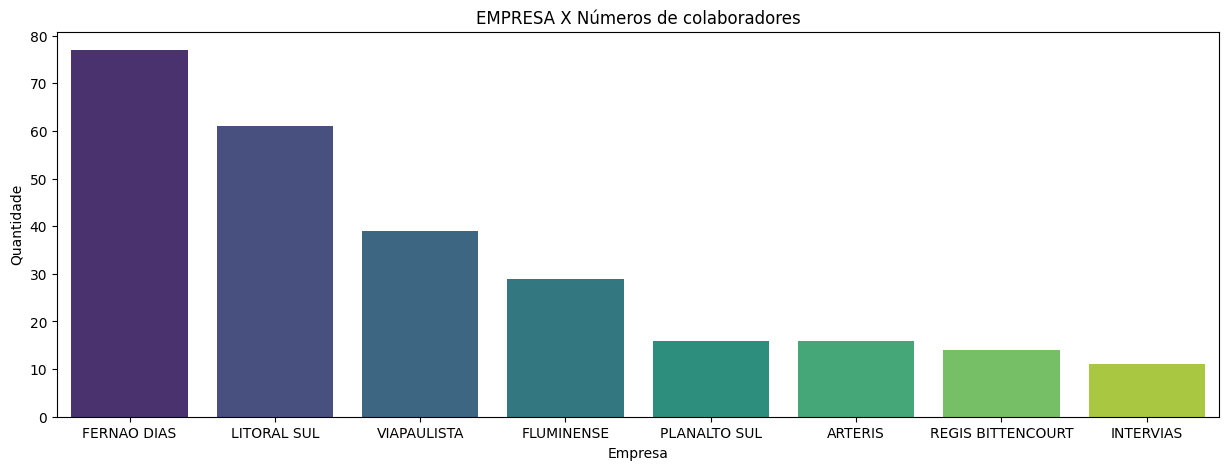

In [217]:
plt.figure(figsize=(15, 5))
grafico_empresa = sns.barplot(x='Empresa', y='Quantidade', data=total_colaboradores, palette='viridis',hue='Empresa',legend=False)
grafico_empresa.set_title('EMPRESA X Números de colaboradores')

## **Quantidade de Contratações por Ano em cada Empresa**

Text(0.5, 1.0, 'Contratações por Ano em Cada Empresa')

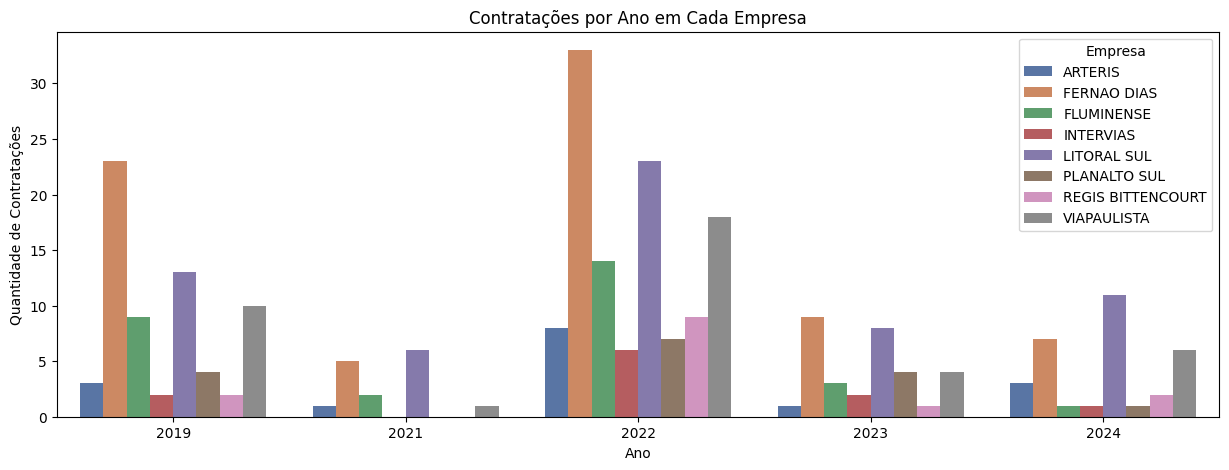

In [224]:
df['Ano'] = df['Entrada'].dt.year

contratacoes_por_ano_empresa = df.groupby(['Ano', 'Empresa'])['Colaborador'].count().reset_index()
contratacoes_por_ano_empresa.columns = ['Ano', 'Empresa', 'Quantidade de Contratações']

plt.figure(figsize=(15, 5))
grafico_contratacoes_ano_empresa = sns.barplot(x='Ano', y='Quantidade de Contratações', hue='Empresa', data=contratacoes_por_ano_empresa, palette='deep')
grafico_contratacoes_ano_empresa.set_title('Contratações por Ano em Cada Empresa')

## **Soma de Salário em cada Empresa**

In [205]:
soma_salario_empresa = df.groupby('Empresa')['Salário'].agg(['sum', 'count']).reset_index()
soma_salario_empresa.columns = ['Empresa', 'Soma Salários', 'Total Colaboradores']
soma_salario_empresa = soma_salario_empresa.sort_values(by='Soma Salários', ascending=False)
soma_salario_empresa

,Empresa,Soma Salários,Total Colaboradores
1,FERNAO DIAS,616238.05,77
4,LITORAL SUL,578932.80,61
7,VIAPAULISTA,352818.70,39
2,FLUMINENSE,169310.85,29
0,ARTERIS,133007.85,16
6,REGIS BITTENCOURT,101907.40,14
3,INTERVIAS,86206.15,11
5,PLANALTO SUL,65812.10,16


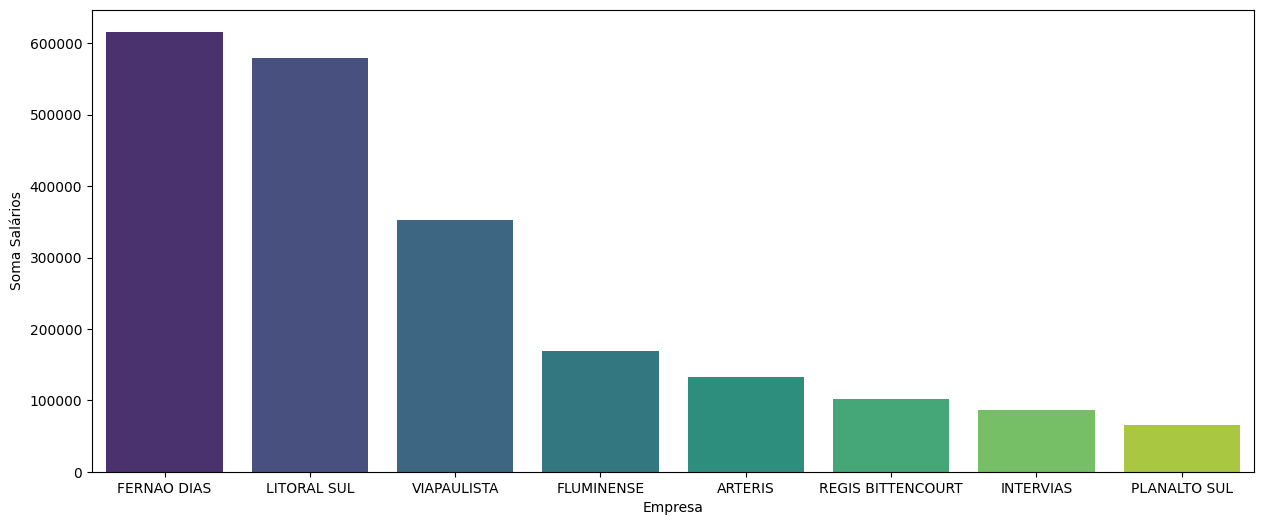

In [222]:
plt.figure(figsize=(15, 6))
grafico_soma_salario = sns.barplot(x='Empresa', y='Soma Salários', hue='Empresa', data=soma_salario_empresa, palette='viridis', legend=False)


## Quantidade de Colaboradores para cada Diretoria nas Empresas

In [207]:
total_colaboradores_diretoria_empresa = df.groupby(['DIRETORIA', 'Empresa'])['Colaborador'].count().reset_index()
total_colaboradores_diretoria_empresa.columns = ['Diretoria', 'Empresa', 'Quantidade de Colaboradores']
total_colaboradores_diretoria_empresa

,Diretoria,Empresa,Quantidade de Colaboradores
0,Dir Engenharia e Implantação,ARTERIS,2
1,Dir Engenharia e Implantação,FERNAO DIAS,8
2,Dir Engenharia e Implantação,FLUMINENSE,6
3,Dir Engenharia e Implantação,INTERVIAS,1
4,Dir Engenharia e Implantação,LITORAL SUL,10
5,Dir Engenharia e Implantação,REGIS BITTENCOURT,2
6,Dir Engenharia e Implantação,VIAPAULISTA,7
7,Dir Financeira,ARTERIS,1
8,Dir Financeira,FERNAO DIAS,5
9,Dir Financeira,FLUMINENSE,4


Text(0.5, 1.0, 'Colaboradores por Diretoria em Cada Empresa')

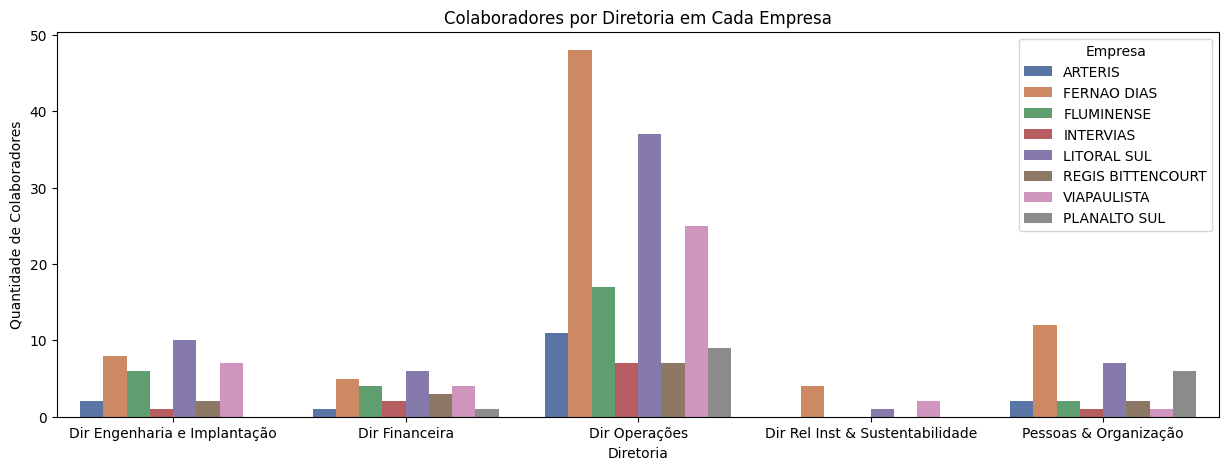

In [208]:
plt.figure(figsize=(15, 5))
grafico_diretoria_colaboradores_empresa = sns.barplot(x='Diretoria', y='Quantidade de Colaboradores', hue='Empresa', data=total_colaboradores_diretoria_empresa, palette='deep')
grafico_diretoria_colaboradores_empresa.set_title('Colaboradores por Diretoria em Cada Empresa')


## **Salvando o DataSet limpo**

In [209]:
df.to_excel('arteris_limpo.xlsx',index=False)